In [17]:
#PRICING OPCIONES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import datetime
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FormatStrFormatter

In [18]:
def bsformula(callput, S0, K, r, T, sigma, q=0):

    #Changing possible integers to float
    S0 = float(S0)
    K = float(K)
    r = float(r)
    T = float(T)
    sigma = float(sigma)


    d1 = (np.log(S0 / K) + (r  + sigma**2 / 2) * T) / (sigma * T**0.5)
    d2 = d1 - sigma * T**0.5
    nd1_prime = 1/(((2*np.pi)**0.5)*(np.exp((d1**2)/2)))

    if callput == 'call':
        nd1 = norm.cdf(d1, )
        nd2 = norm.cdf(d2, )        
        optionValue = S0 * nd1 - K * np.exp(-r * T) * nd2 
        delta = nd1        

    elif callput == 'put':
        nd1 = norm.cdf(-d1, )
        nd2 = norm.cdf(-d2, )        
        optionValue = -S0 *  nd1 + K * np.exp(-r * T) * nd2
        delta = -nd1        

    vega =  S0*(T**0.5)*nd1_prime 
    return optionValue, delta, vega


bsformula('put',3600,3500,0.015,0.25,0.12,0.0005)

(39.976575353208545, -0.2870530304017422, 613.188992742056)

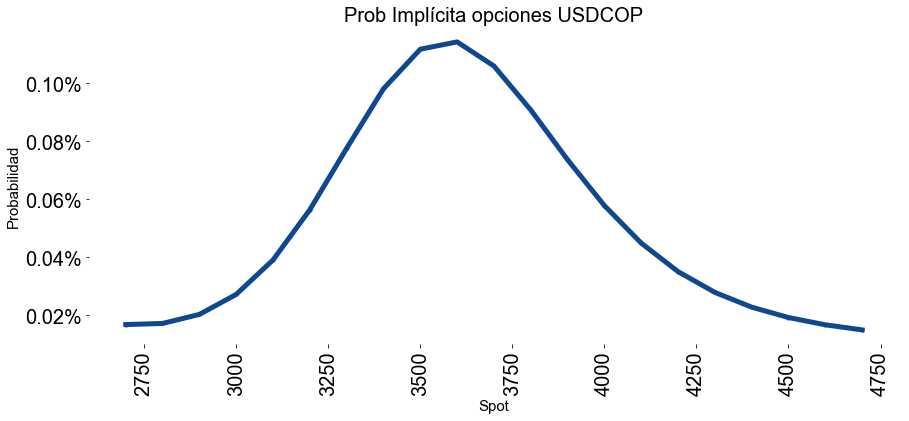

In [25]:
def bsparabolicprob( S0, x, r, tenor,sigma0, sigma1, sigma2, q=0., t=0.):

    RN_prob = np.array([0.0])
    y = np.asarray(x)

    if y.size == 1:

        #Changing possible integers to float
        S0 = float(S0)
        x = float(x)
        r = float(r)
        tenor = float(tenor)
        sigma0 = float(sigma0)
        sigma1 = float(sigma1)
        sigma2 = float(sigma2)
        

        #Skew function
        sigma = sigma0 + sigma1*np.log(y/S0)+sigma2*(np.log(y/S0))**2

        #First derivative of the skew function with respect to strike
        sigma_prime = (sigma1/y) + (2*sigma2/y)*np.log(y/S0)

        #Second derivative of the skew function with respect to strike
        sigma_primeprime = (1/y**2)*(-sigma1 +2*sigma2- 2*sigma2*np.log(y/S0))    

        T = tenor - t
        d1 = (np.log(S0 / y) + (r  + sigma**2 / 2) * T) / (sigma * T**0.5)
        d2 = d1 - sigma * T**0.5

        
        #we need to calculate different derivatives to express the second total derivative of the price with respect to the strike. 

        #Vega
        vega =  S0*(T**0.5)*norm.pdf(d1)

        #Partial second derivative of the price with respect to the vol
        D2CDVOL2 = (vega*d1*d2)/sigma

        #Partial second derivative of the price with respect to the strike
        D2CDK2 = (np.exp(-r*tenor)*norm.pdf(d2))/(y*sigma*tenor**0.5)

        #Partial cross second derivative of the price with respect to the strike and the vol
        D2CDKDVOL = (np.exp(-r*tenor)*norm.pdf(d2)*d1)/sigma

        #Total second derivative of the price with respect to strike
        TOTAL = D2CDVOL2*(sigma_prime**2)+2*D2CDKDVOL*sigma_prime+vega*sigma_primeprime+D2CDK2
        
        #Risk neutral prob measure           
        RN_prob = np.exp(r*tenor)*TOTAL
    
        return RN_prob

    else:

        #Changing possible integers to float
        S0 = float(S0)
        x = x.astype(float)
        r = float(r)
        tenor = float(tenor)
        sigma0 = float(sigma0)
        sigma1 = float(sigma1)
        sigma2 = float(sigma2)
           
        for i in range(0,y.size):
        
            #Skew function
            sigma = sigma0 + sigma1*np.log(x[i]/S0)+sigma2*(np.log(x[i]/S0))**2

            #First derivative of the skew function with respect to strike
            sigma_prime = (sigma1/x[i]) + (2*sigma2/x[i])*np.log(x[i]/S0)

            #Second derivative of the skew function with respect to strike
            sigma_primeprime = (1/x[i]**2)*(-sigma1 +2*sigma2- 2*sigma2*np.log(x[i]/S0))    

            T = tenor - t
            d1 = (np.log(S0 / x[i]) + (r  + sigma**2 / 2) * T) / (sigma * T**0.5)
            d2 = d1 - sigma * T**0.5

            
            #we need to calculate different derivatives to express the second total derivative of the price with respect to the strike. 

            #Vega
            vega =  S0*(T**0.5)*norm.pdf(d1)

            #Partial second derivative of the price with respect to the vol
            D2CDVOL2 = (vega*d1*d2)/sigma

            #Partial second derivative of the price with respect to the strike
            D2CDK2 = (np.exp(-r*tenor)*norm.pdf(d2))/(x[i]*sigma*tenor**0.5)

            #Partial cross second derivative of the price with respect to the strike and the vol
            D2CDKDVOL = (np.exp(-r*tenor)*norm.pdf(d2)*d1)/sigma

            #Total second derivative of the price with respect to strike
            TOTAL = D2CDVOL2*(sigma_prime**2)+2*D2CDKDVOL*sigma_prime+vega*sigma_primeprime+D2CDK2
            
            #Risk neutral prob measure   
            RN_prob.resize(y.size)
            RN_prob[i] = np.exp(r*tenor)*TOTAL
        
        return RN_prob
    
x = np.array([2700,2800,2900,3000,3100,3200,3300,3400,3500,3600,3700,3800,3900,4000,4100,4200,4300,4400,4500,4600,4700,])
  

RN_prob1 = bsparabolicprob( 3650, x, 0.015, 1,0.14, 0.16, 1.4, q=0., t=0.) #4 mar 2021
RN_prob2 = bsparabolicprob( 3650, x, 0.015, 1,0.14, 0.19, 1.82, q=0., t=0.) #9 jun 2020

font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=20)

#Gráfico
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x,RN_prob1*100,marker='o', linestyle='solid',linewidth = 5,color='#0D468D',alpha = 0.99,label='5 mar 2021',markersize=3)
# ax.plot(x,RN_prob2*100,marker='o', linestyle='solid',linewidth = 5,color='gold',alpha = 0.99,label='9 jun 2020',markersize=3)
# ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.9, 1.3),ncol=5,markerscale=3)
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=20)
plt.xticks(fontname = "Arial",fontsize=20)
ax.set_title("Prob Implícita opciones USDCOP",fontsize=20)
ax.title.set_fontfamily('arial')
ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
ax.set_ylabel('Probabilidad',fontname = "Arial", fontsize=15,color='black')
ax.set_xlabel('Spot',fontname = "Arial", fontsize=15,color='black')
plt.subplots_adjust(bottom=0.1, right=2.0, top=1.2)

plt.box(on=None)

plt.show()